In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import palettable
from scipy.interpolate import griddata
from palettable.cartocolors.qualitative import Prism_8
import matplotlib as mpl
import pickle
import networkx as nx

sys.path.insert(0, 'utils/')
import localize as lc

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Localization and splitting based on F after round one of l2,1 

In [14]:
envs=["4NQO","23C","25C","27C","30C","33C","35C","37C","cu","eth","gu","li","mann","mol","raff","sds","suloc","ynb"]
envs = sorted(envs)
inloc = "../QTL/BBQ_data_processed"
results_dir = "BBQ_results_6_17"
cc= "0.99"
lt2 = "0.003"
width = "50"
std = "2"
pair = ("l2", "0.001")
norm, lt1  = pair[0],pair[1]
print("\n")
F1 = np.load(f"{results_dir}/first_F_cc_{cc}.npy")
F2 = np.load(f"{results_dir}/second_F_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}_norm_{norm}.npy")
L1 = np.load(f"{results_dir}/loci_kept_cc_{cc}.npy")
L2 = np.load(f"{results_dir}/loci_kept_after_localization_round_1_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}_norm_{norm}.npy")
path_to_ci = f"{results_dir}/CI_after_localization_round_2_cc_{cc}_lt1_{lt1}_lt2_{lt2}_width_{width}_std_{std}_norm_{norm}.pickle"
final_loci, final_loci_lists = pickle.load(open(path_to_ci,"rb"))
loaded_preds =  np.load(f"{results_dir}/second_preds_cc_{cc}_lt1_{lt1}_width_{width}_std_{std}_norm_{norm}.npy")
causal_loci = np.where(L2==True)[0]
GT = np.load(f"{inloc}/geno_train.npy")
PT = np.load(f"{inloc}/pheno_train.npy") 
GV = np.load(f"{inloc}/geno_val.npy")
PV = np.load(f"{inloc}/pheno_val.npy")

F = F1
loci_to_keep = L1

Xtrain = GT[:,loci_to_keep]
preds =  np.load(f"{results_dir}/first_preds_cc_{cc}.npy")



computed_preds = Xtrain @ F.T
affine_term = (preds-computed_preds)[0,...]

In [17]:
idx_filt, loci_filt, F_ori, X, Y, Ysub, loci = lc.prep_arrays(F, GT, PT, loci_to_keep, float(lt1), True, affine_term, norm = norm)


subtracting out effects of 1129 loci with l2 norm > 0.001 


processing locus 4588, 30644


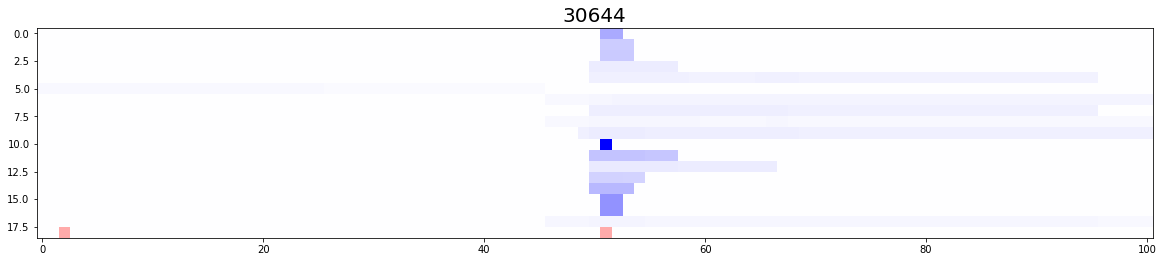

processing locus 1071, 7117


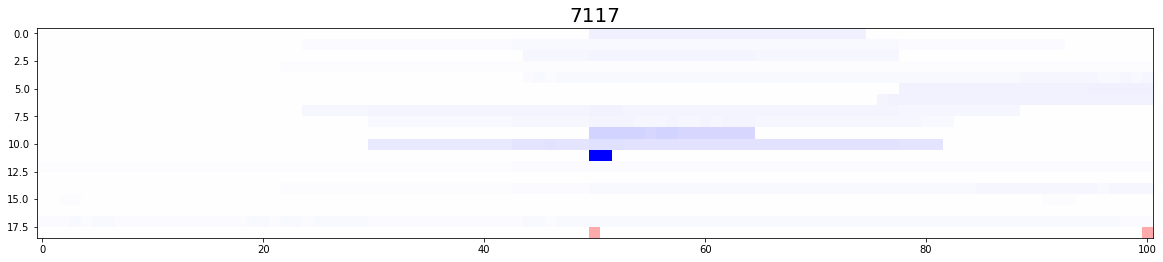

processing locus 5263, 34729


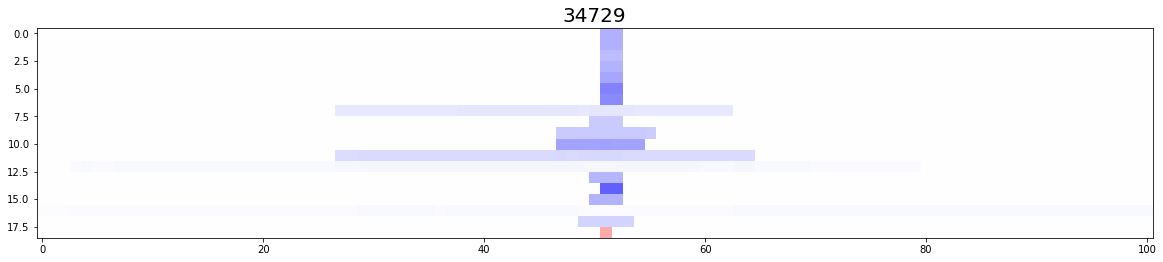

processing locus 1070, 7115


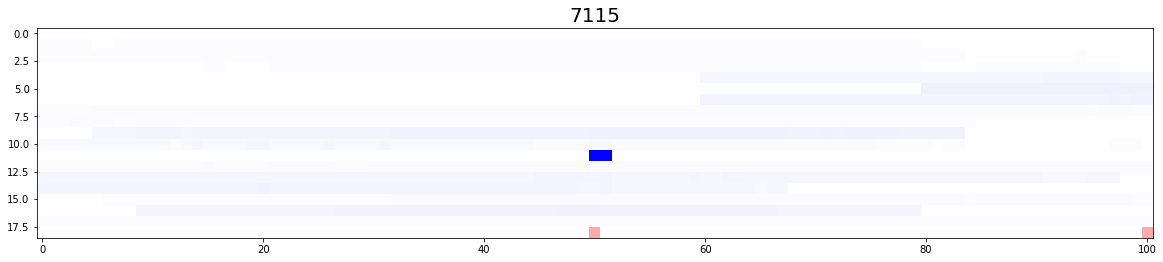

processing locus 4306, 28215


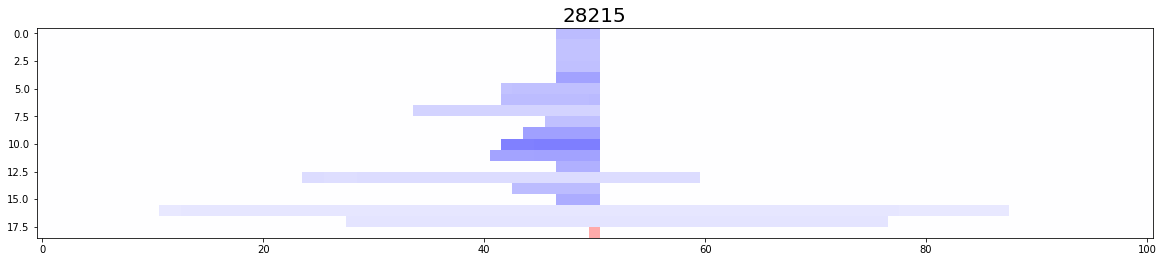

processing locus 5264, 34732


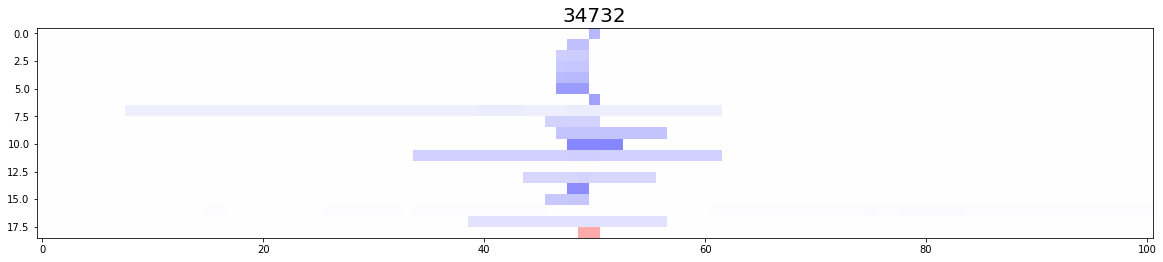

processing locus 5266, 34740


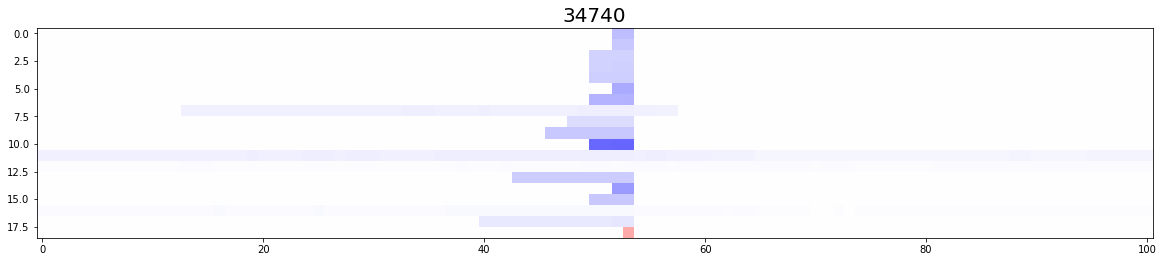

processing locus 4589, 30648


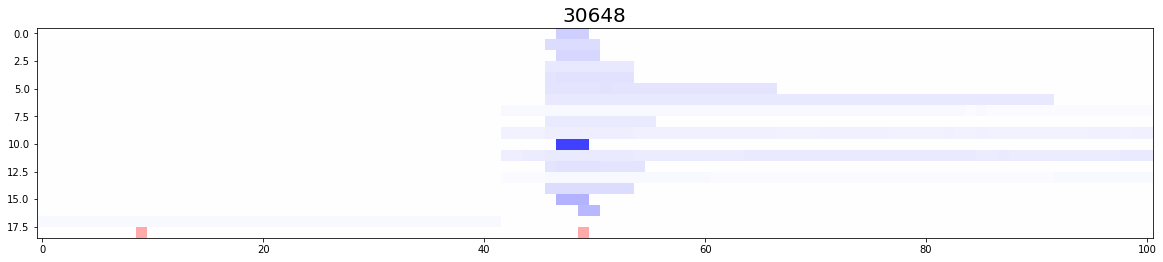

processing locus 4307, 28216


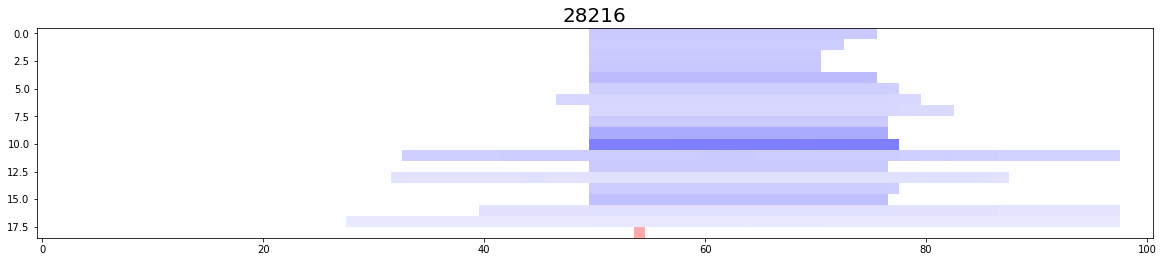

processing locus 3518, 22936


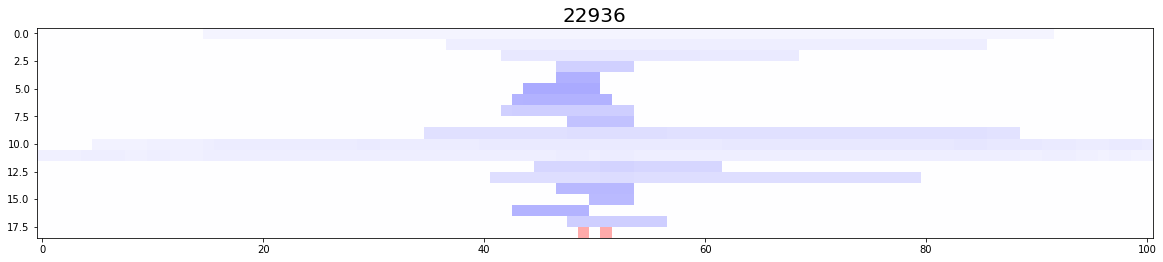

processing locus 5349, 35223


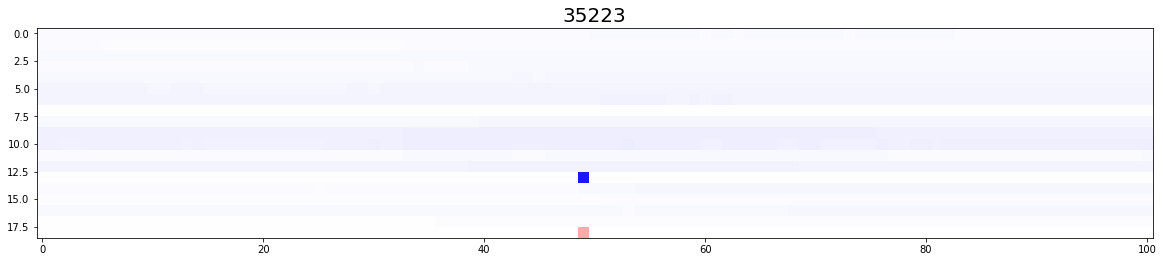

processing locus 4607, 30742


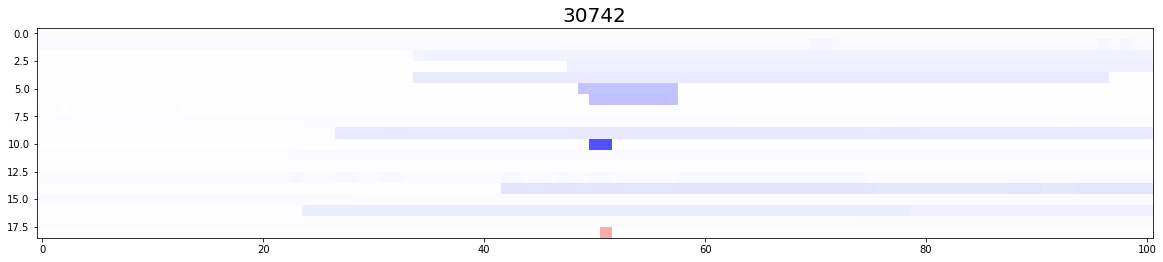

processing locus 4768, 31924


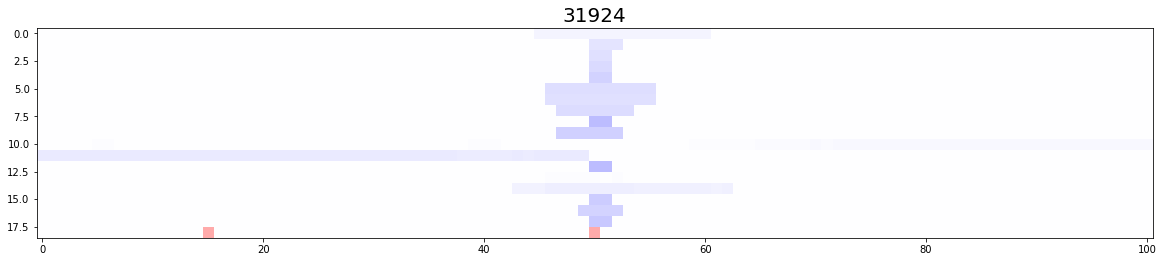

processing locus 5495, 36443


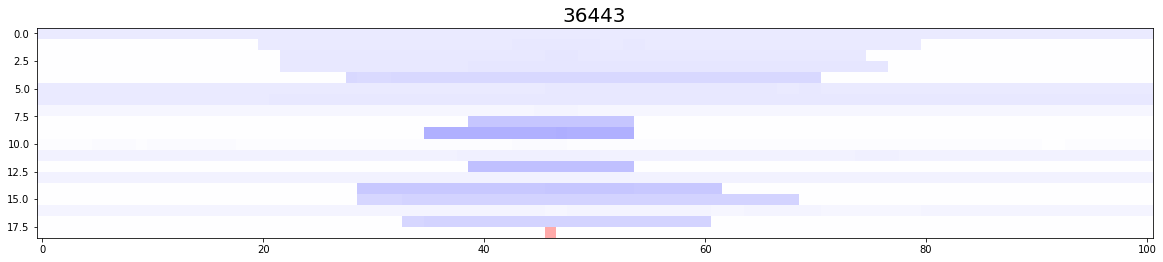

processing locus 6196, 40920


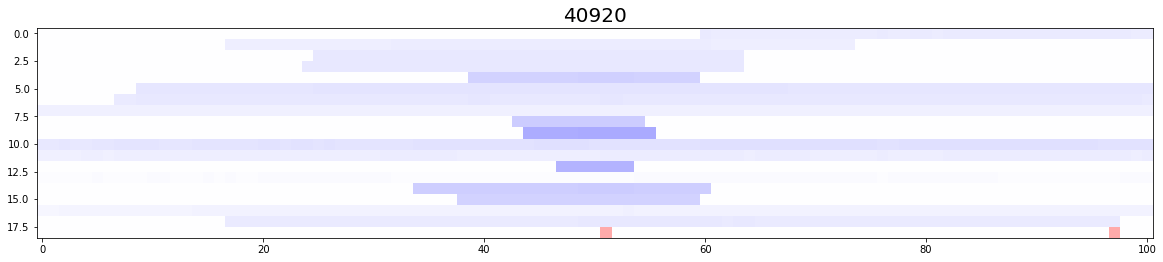

processing locus 5477, 36239


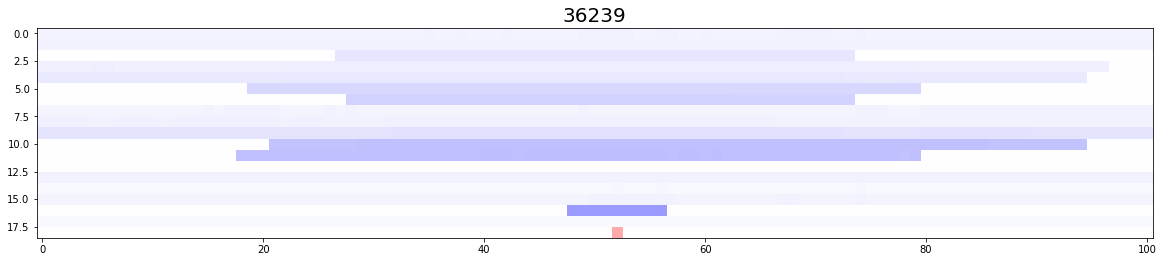

processing locus 4518, 30179


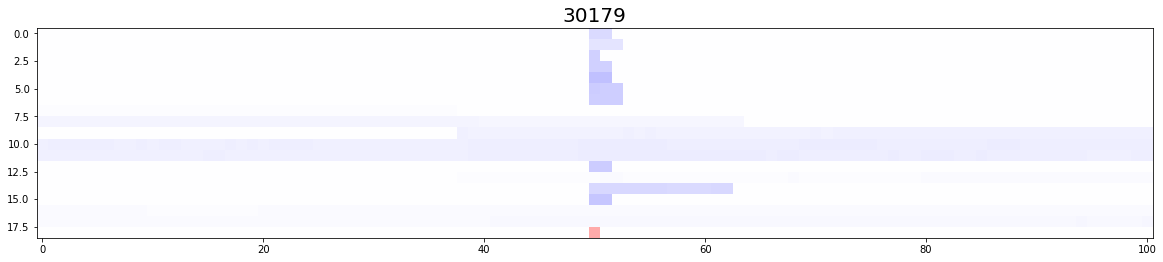

processing locus 4992, 33213


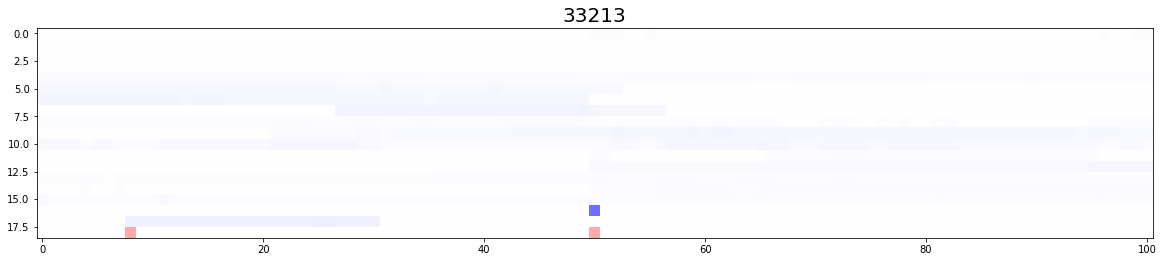

processing locus 5496, 36457


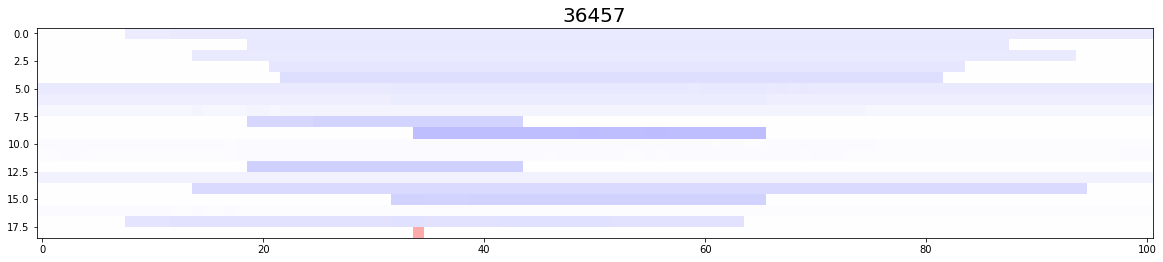

processing locus 5134, 34054


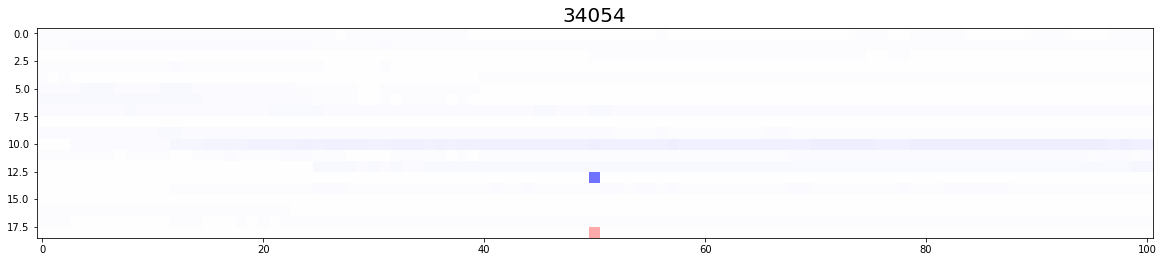

processing locus 1532, 9516


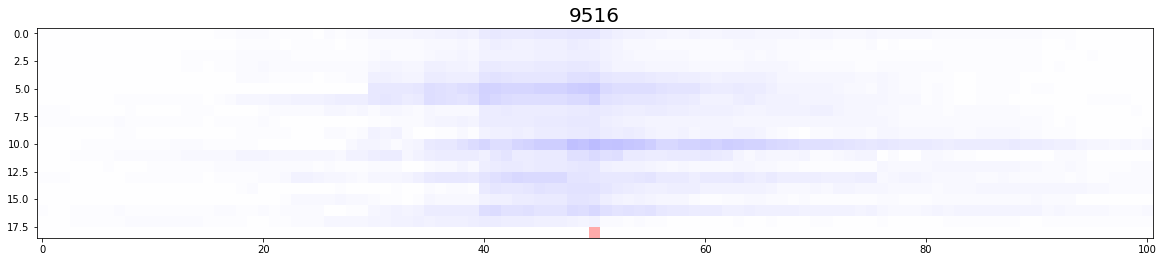

processing locus 5133, 34052


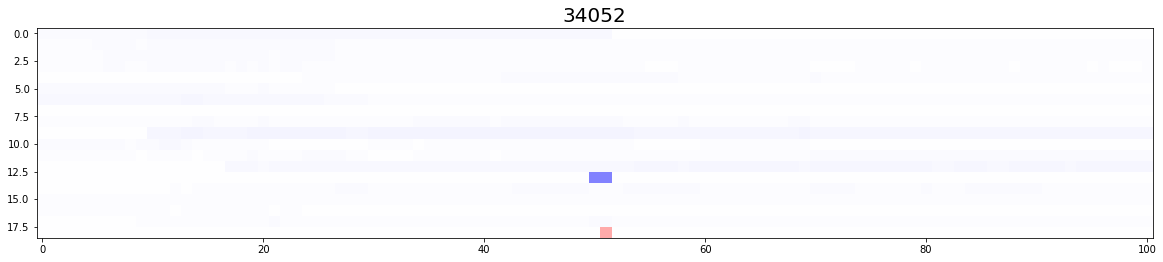

processing locus 4318, 28349


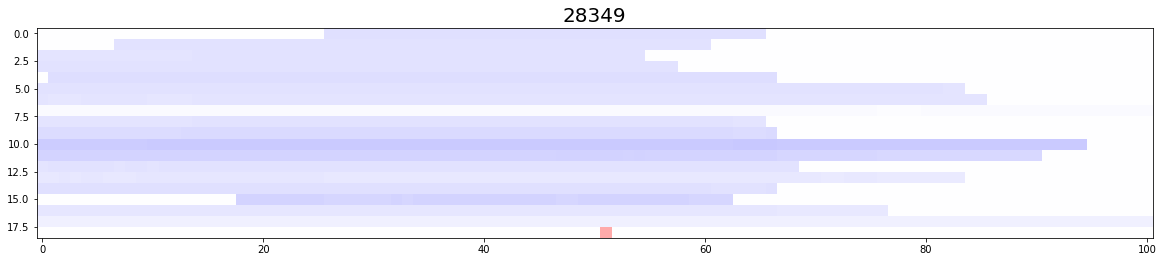

processing locus 1389, 8532


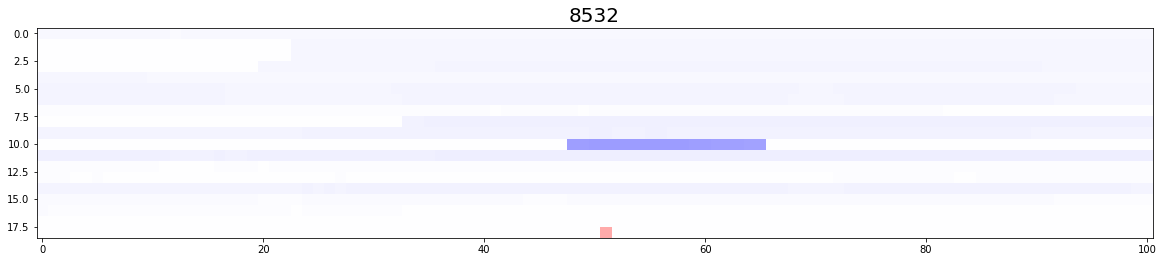

processing locus 4090, 26939


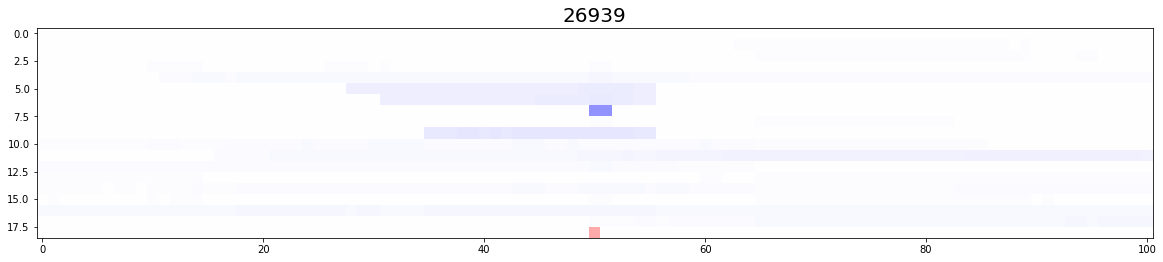

processing locus 5271, 34750


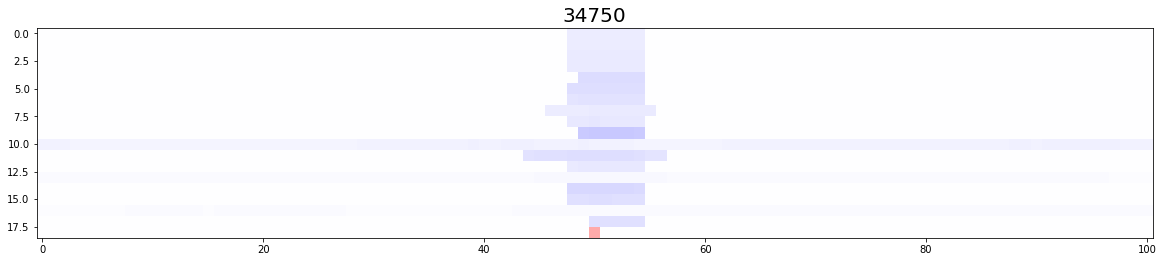

processing locus 1075, 7137


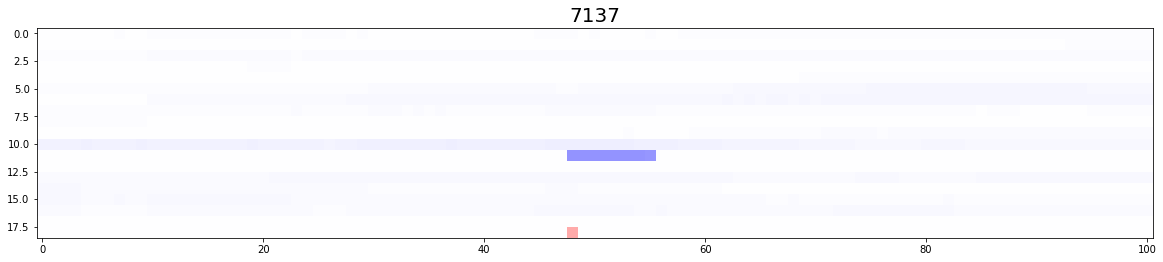

processing locus 5257, 34706


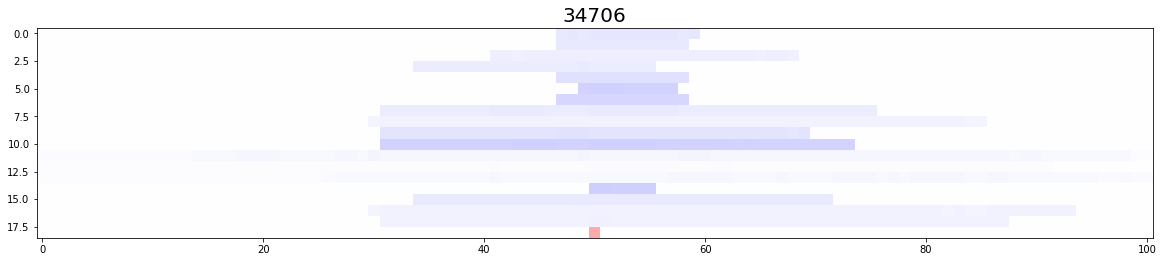

processing locus 3206, 20774


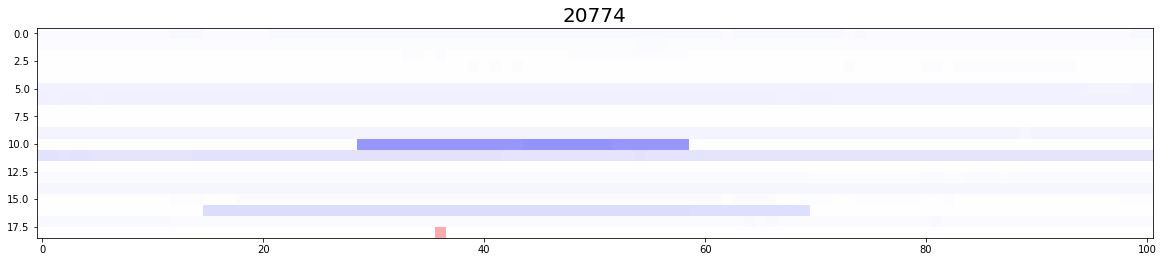

processing locus 4217, 27634


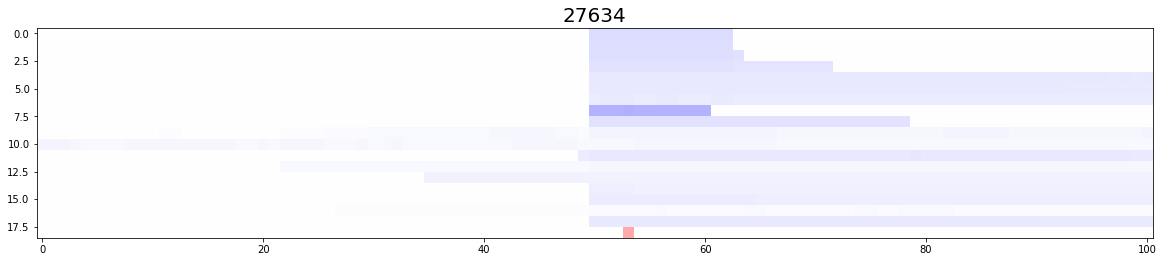

processing locus 1745, 10483


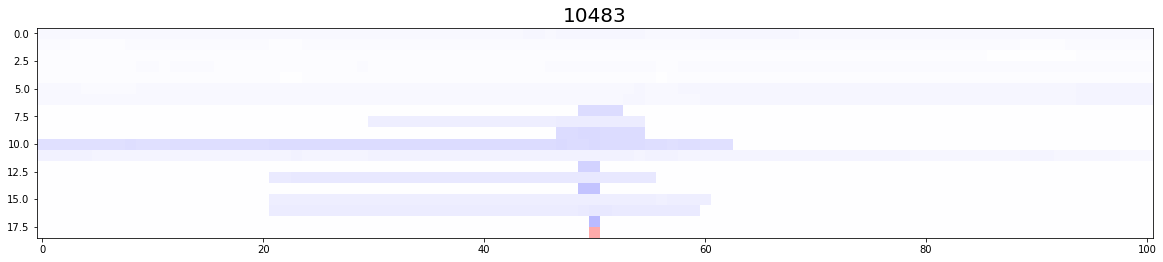

processing locus 4608, 30748


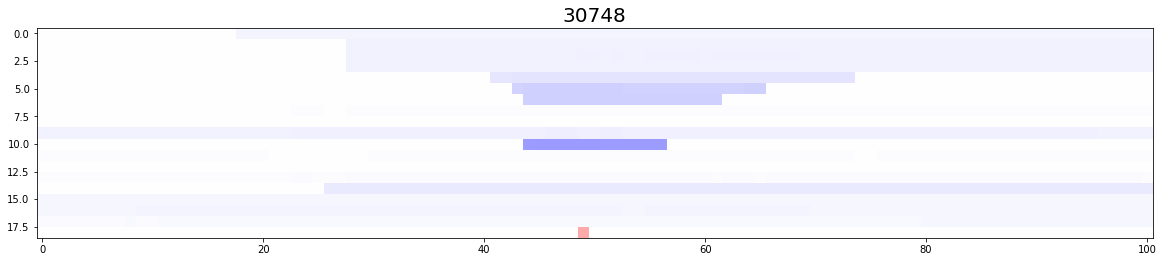

processing locus 3517, 22929


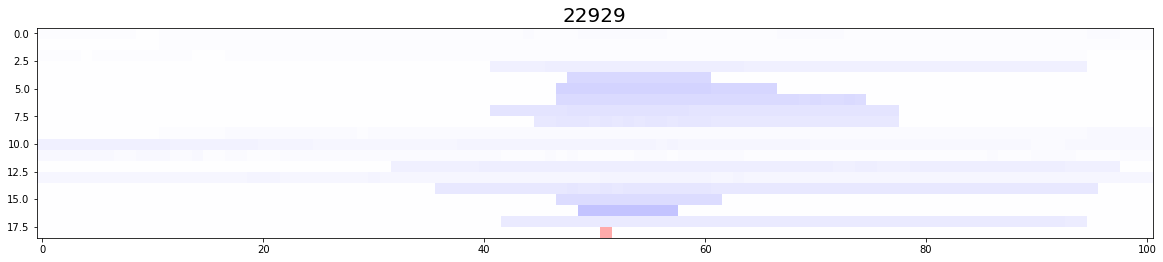

processing locus 5910, 39495


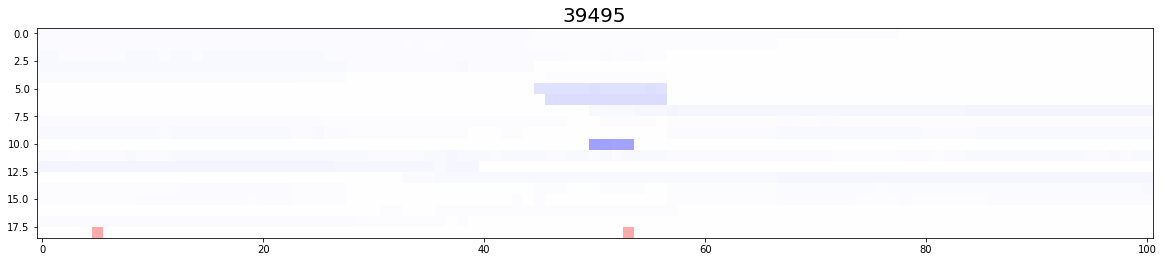

processing locus 3522, 22967


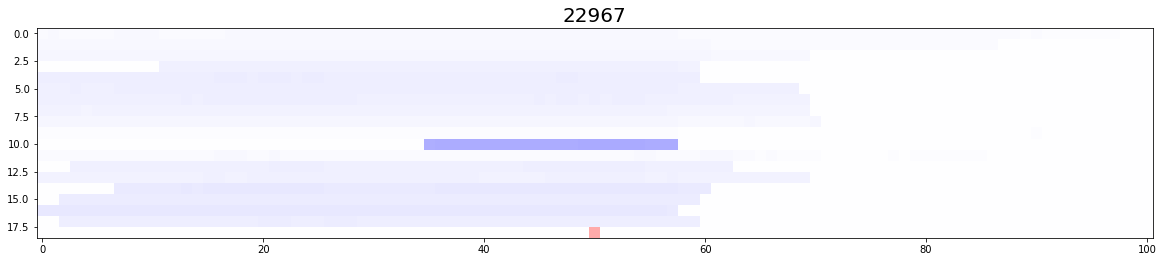

processing locus 403, 2984


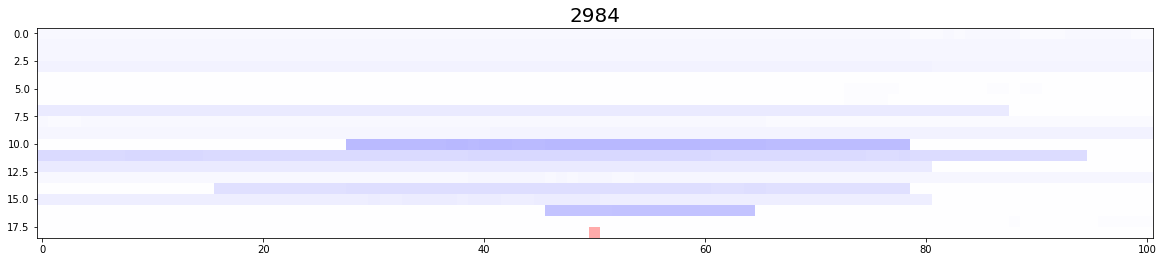

processing locus 3982, 26323


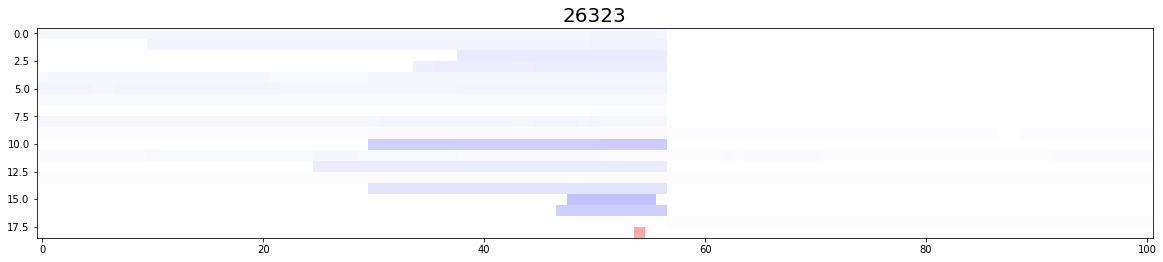

processing locus 5500, 36513


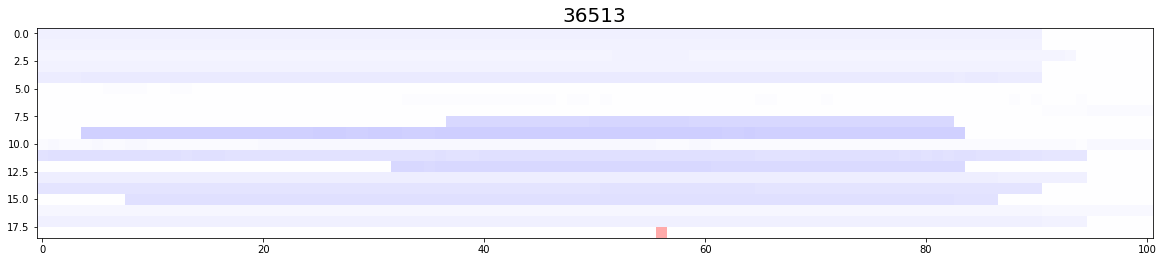

processing locus 3207, 20782


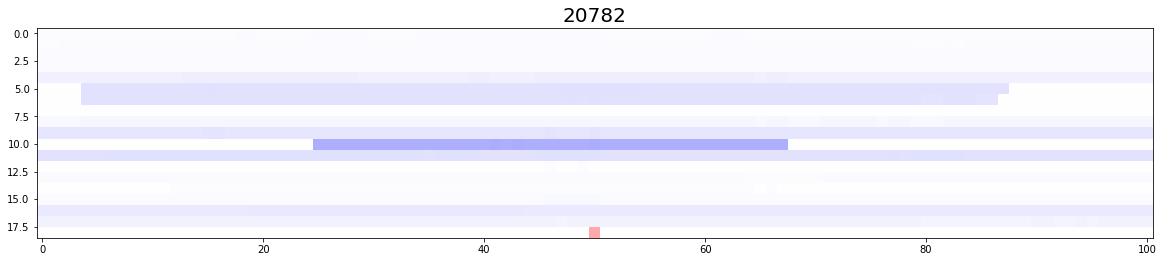

processing locus 4949, 33066


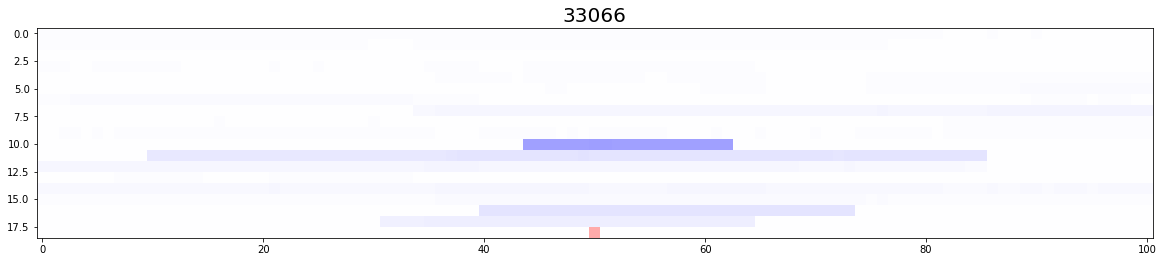

processing locus 5719, 38339


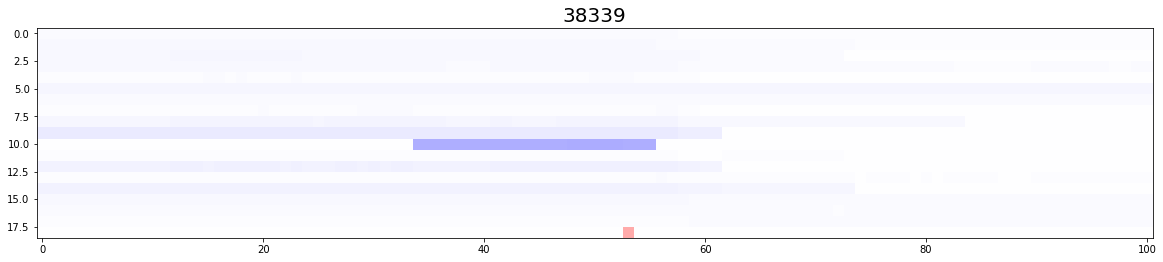

processing locus 5279, 34793


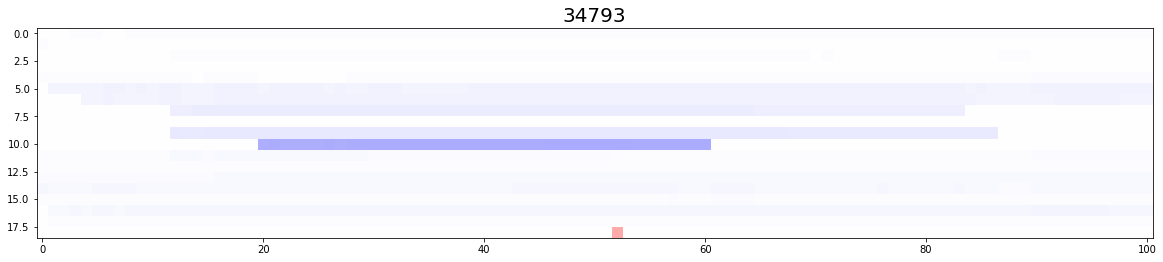

processing locus 2105, 13292


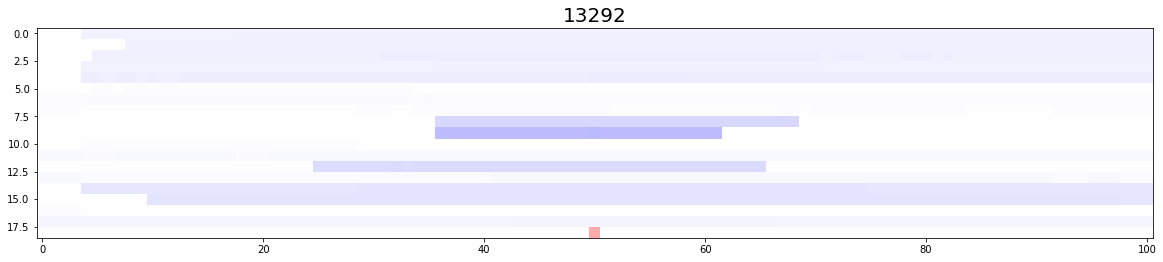

processing locus 4063, 26872


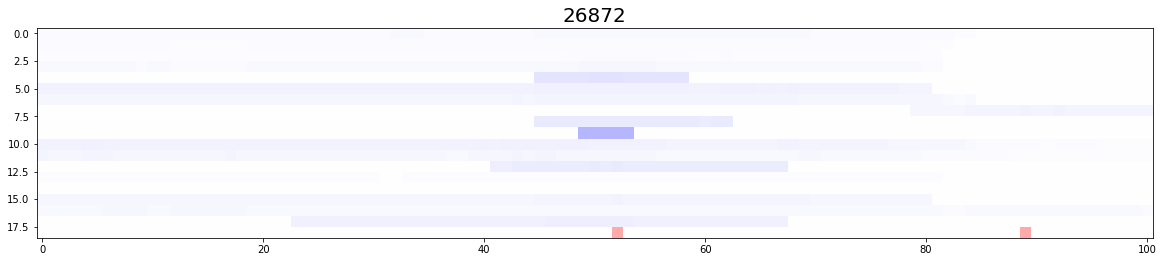

processing locus 5659, 37698


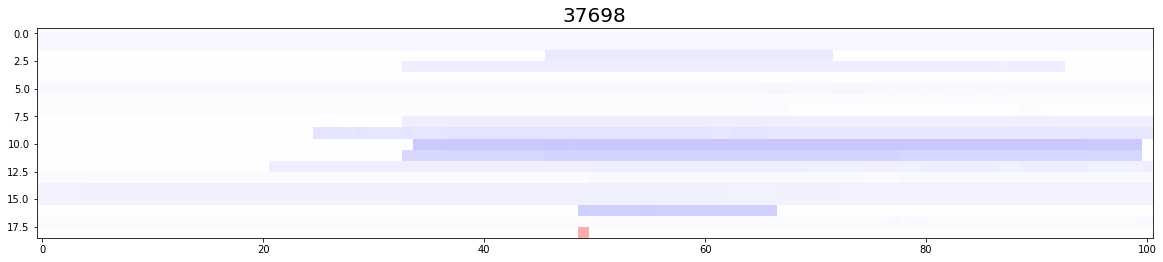

processing locus 4224, 27708


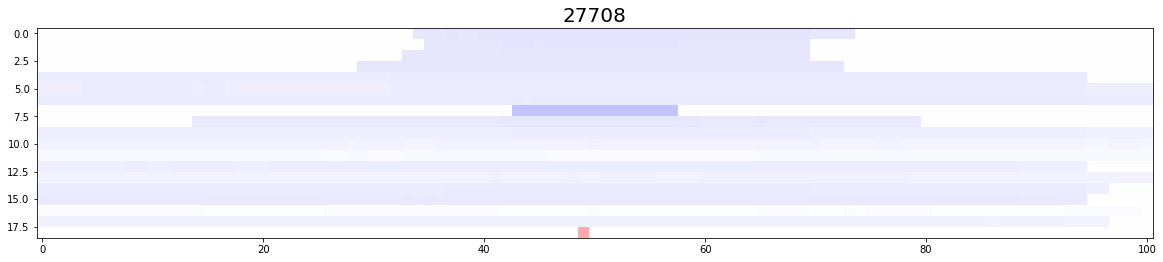

processing locus 2912, 18661


KeyboardInterrupt: 

In [22]:

display = True 
verbose = True
to_keep_all = []
for ind in range(len(idx_filt)):
    l = idx_filt[ind]
    ls = loci_filt[ind]
    ran, fbest, intervals = lc.compute_fbest_and_intervals(l, ls, F_ori, X, Y, Ysub, int(width), int(std), verbose)
        
    sums = np.sum(intervals*np.abs(fbest), axis = 0)
    sm = np.zeros_like(sums)

    r_fbest = np.copy(fbest)
    r_intervals = np.copy(intervals)
    tops = []
    while r_intervals.shape[0]>0:
        sums = np.sum(r_intervals*np.abs(r_fbest), axis = 0)
        top = np.argmax(sums)
        keep = r_intervals[:,top] == 0
        r_intervals= r_intervals[keep,:]
        r_fbest= r_fbest[keep, :]
        tops.append(top) 
    #print(tops)
    to_keep_all.append([ls +50-i for i in tops])

    if display:
        for top in tops:
            sm[top] = -0.01

        g = np.concatenate([intervals*np.abs(fbest), sm[None,:]])
        plt.figure(figsize = (20,10))
        plt.imshow(g, vmin = -.03, vmax = .03, cmap ="bwr_r")
        plt.title(ls, fontsize = 20)
        plt.show()

        
        
        

In [23]:
envs

['23C',
 '25C',
 '27C',
 '30C',
 '33C',
 '35C',
 '37C',
 '4NQO',
 'cu',
 'eth',
 'gu',
 'li',
 'mann',
 'mol',
 'raff',
 'sds',
 'suloc',
 'ynb']